In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import config

"""
This module using Selenium to crawl the web, output: a list of href to product page (hrefs.txt)
"""

'\nThis module using Selenium to crawl the web, output: a list of href to product page (hrefs.txt)\n'

In [2]:
# Initialize the WebDriver
driver = webdriver.Firefox()  # Ensure you have the ChromeDriver installed and in PATH

In [ ]:
cols = ["prefix", "link"]
data = []
filterer = "yt-simple-endpoint style-scope ytd-video-renderer"

for postfix in config.POSTFIX:
    for comb in config.COMBINATIONS:
        url = config.PREFIX + postfix + "+" + comb
        # Redirect
        driver.get(url)
        # Wait for the page to load completely (optional, depending on the page)
        driver.implicitly_wait(10)

        elements = driver.find_elements(By.CSS_SELECTOR, f"a.{filterer.replace(' ', '.')}")
        elements = [e for e in elements if e.get_attribute("href") is not None]
        for element in elements:
            href = element.get_attribute("href")
            if href is not None and "/shorts/" not in href:
                data.append([postfix, href])
                print(f"Found href: {href}")
        print(f"Current total hrefs: {len(data)}")

# Close the WebDriver
driver.quit()

Found href: https://www.youtube.com/watch?v=b4Q5JPwOq7E&pp=ygUidGluIHThu6ljIHZ1aSB24bq7IHRyxrDhu51uZyBo4buNYw%3D%3D
Found href: https://www.youtube.com/watch?v=_pMLRYGx9Is&pp=ygUidGluIHThu6ljIHZ1aSB24bq7IHRyxrDhu51uZyBo4buNYw%3D%3D
Found href: https://www.youtube.com/shorts/e5iEp-s5q0Y
Found href: https://www.youtube.com/watch?v=CdGHKsc-Rdc&pp=ygUidGluIHThu6ljIHZ1aSB24bq7IHRyxrDhu51uZyBo4buNY9IHCQl-CQGHKiGM7w%3D%3D
Found href: https://www.youtube.com/watch?v=4KPn_Pnq75k&pp=ygUidGluIHThu6ljIHZ1aSB24bq7IHRyxrDhu51uZyBo4buNYw%3D%3D
Found href: https://www.youtube.com/watch?v=RBKqW_QqbkA&pp=ygUidGluIHThu6ljIHZ1aSB24bq7IHRyxrDhu51uZyBo4buNY9IHCQl-CQGHKiGM7w%3D%3D
Found href: https://www.youtube.com/watch?v=y2-D5KD2UNY&pp=ygUidGluIHThu6ljIHZ1aSB24bq7IHRyxrDhu51uZyBo4buNYw%3D%3D
Found href: https://www.youtube.com/watch?v=RBQ8BNubJtI&pp=ygUidGluIHThu6ljIHZ1aSB24bq7IHRyxrDhu51uZyBo4buNYw%3D%3D
Found href: https://www.youtube.com/watch?v=Xp3PEvuhgZw&pp=ygUidGluIHThu6ljIHZ1aSB24bq7IHRyxrDhu51uZy

In [8]:
import pandas as pd

df = pd.DataFrame(data, columns=cols)
# Remove all hrefs contains "shorts"
df = df[~df["link"].str.contains("/shorts/")]
print(f"Total hrefs after removing shorts: {len(df)}")
# Remove duplicates
df = df.drop_duplicates(subset=["link"])
print(f"Total hrefs after removing duplicates: {len(df)}")
# Save to file
df.to_csv("hrefs.txt", index=False)

Total hrefs after removing shorts: 183
Total hrefs after removing duplicates: 183


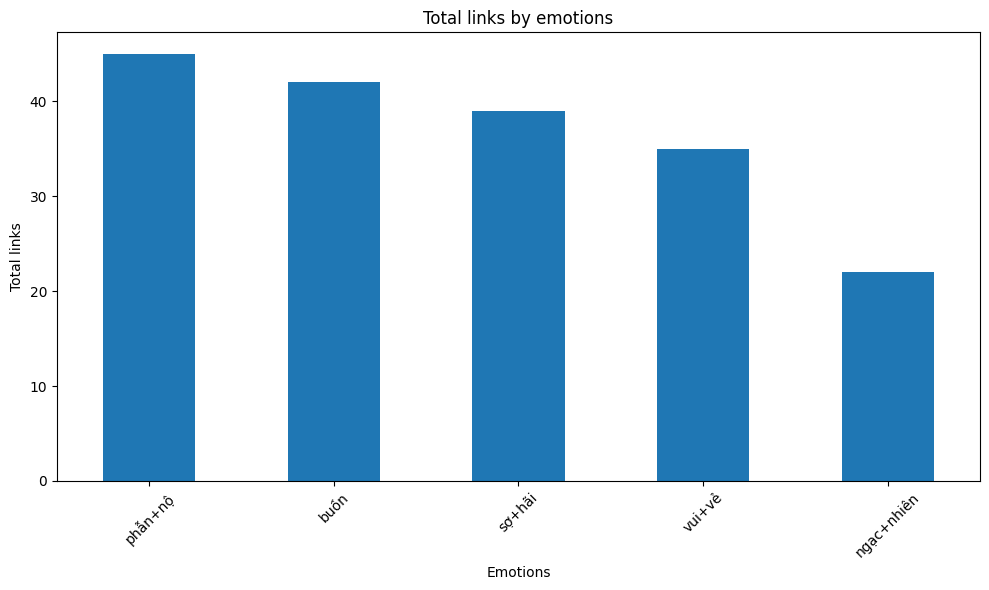

In [9]:
# Plot total links by emotions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df["prefix"].value_counts().plot(kind="bar")
plt.title("Total links by emotions")
plt.xlabel("Emotions")
plt.ylabel("Total links")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()